In [1]:
import os
import glob
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import ExcelWriter
import smogn

In [21]:
df = pd.read_excel("df.xlsx")
df

,flow rate [L/min],1,10,100,1000,10000,20,20000,3,300,3000,30000,5,50,5000,600,file_name,flow rate [L/min].1,name,region
0,4,8265.097029,378.445033,75.352151,33.566755,1063.968209,154.502470,20856.106222,1704.616854,45.660829,68.398689,45329.461542,978.952115,63.036680,187.140728,28.035475,4LPM_0_vestibule,4,0,vestibule
1,4,8985.950271,770.849137,68.462543,47.775341,2806.679715,299.060865,21054.347839,2895.491860,57.514876,169.406360,47848.188456,1705.324066,117.676156,466.813924,45.883350,4LPM_1_nasalValve,4,1,nasal valve
2,4,199.467239,17.201146,0.001000,0.001000,52.843664,10.691412,119.241486,83.651605,2.358141,3.563768,249.170323,73.677415,3.563820,7.127518,0.001000,4LPM_2_olfactory,4,2,olfactory
3,4,1248.660321,231.601110,23.215069,30.469728,1779.933760,127.355780,8796.516633,712.300422,20.313060,295.415325,1304.602888,400.198691,41.904471,539.772463,29.018766,4LPM_3_nasopharynx,4,3,nasopharynx
4,15,6623.695564,459.750858,140.057856,139.610274,36498.980064,207.437254,119601.797958,1505.572846,133.783551,302.453090,176759.893381,795.674482,177.779194,1744.885421,118.428420,15LPM_0_vestibule,15,0,vestibule
5,15,5927.387127,314.770203,91.909235,86.382058,29152.266018,166.914933,47088.238571,1465.683206,81.360483,148.093899,37836.280856,750.876531,101.138312,1002.863464,108.372721,15LPM_1_nasalValve,15,1,nasal valve
6,15,39.311525,0.001000,0.001000,0.001000,17.895162,0.001000,1246.840366,35.637832,0.001000,0.001000,621.333649,14.255376,0.001000,0.001000,0.001000,15LPM_2_olfactory,15,2,olfactory
7,15,2321.332548,475.535742,338.032232,356.930635,3218.885154,373.756650,1836.962555,809.947367,313.403978,572.505768,44.514303,613.576979,324.414681,927.066027,330.815240,15LPM_3_nasopharynx,15,3,nasopharynx
8,30,6801.170143,566.789168,230.732856,249.403738,78634.036289,375.141739,164060.841960,1628.554927,238.194239,2494.261259,208549.033296,937.338115,346.543731,17399.739350,246.811594,30LPM_0_vestibule,30,0,vestibule
9,30,4966.585386,361.867645,101.792117,91.469921,43501.575058,172.790019,40272.405137,1295.663240,100.444615,607.430590,31820.624300,678.347772,125.115913,7716.283246,92.153815,30LPM_1_nasalValve,30,1,nasal valve


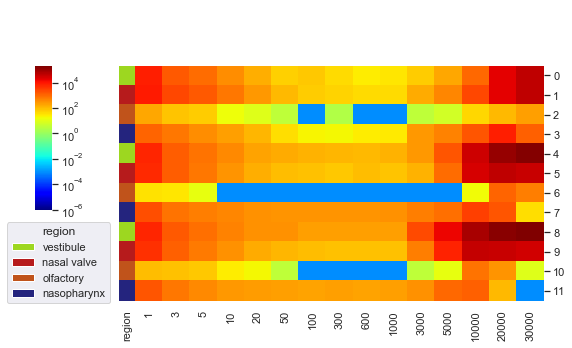

In [14]:
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib.colors import LinearSegmentedColormap
df =df[['1','3','5','10', '20','50', '100','300', '600', '1000', '3000', '5000', '10000','20000', '30000', 'flow rate [L/min]','region']]


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
colors = { "#24247e",  "#c0531b", "#9dd720", "#b61b1c"}

#colors =['aqua', 'brown', 'lime', 'coral', 'fuchsia','goldenrod', 'green', 'grey', 'orange', 'magenta', 'olive', 'wheat', 'violet', 'blue', 'yellow', 'pink', 'red']

species = df.pop('region')
species2 =df.pop("flow rate [L/min]")

sns.set(font_scale=1)

#my_pal = {"vestibule": "#24247e", "nasal valve": "#9dd720", "olfactory":"#c0531b", "nasopharynx":"#b61b1c"}
#ax = sns.boxplot(x="region", y="log10(Dose) [ng/cm$^2$]", data=df_melt, palette=my_pal, saturation=100, medianprops=medianprops, order=['nasopharynx','olfactory','nasal valve','vestibule'])
#ax = sns.swarmplot(x="region", y="log10(Dose) [ng/cm$^2$]", data=df_melt, palette=my_pal_2, order=['nasopharynx','olfactory','nasal valve','vestibule'])
#plt.xticks('nasopharynx','olfactory','nasal valve','vestibule')


lut = dict(zip(species.unique(), colors))
row_colors = species.map(lut)
g = sns.clustermap(df, norm=LogNorm(), row_cluster=False, col_cluster=False, vmin=1e-6, vmax=df['30000'].max(), cmap="jet", cbar_pos=(0.06, 0.4, 0.03, 0.4),figsize=(8, 5), row_colors=row_colors, cbar_kws={'anchor':(0.05,0.5)})

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

from matplotlib.patches import Patch
import matplotlib.pyplot as plt
sns.set(font_scale=1)
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='region',
           bbox_to_anchor=(0.2,0.38), bbox_transform=plt.gcf().transFigure, loc='best')


plt.savefig('heatmap_total_logarithmic.jpeg',dpi=300,bbox_to_inches='tight')
plt.show()

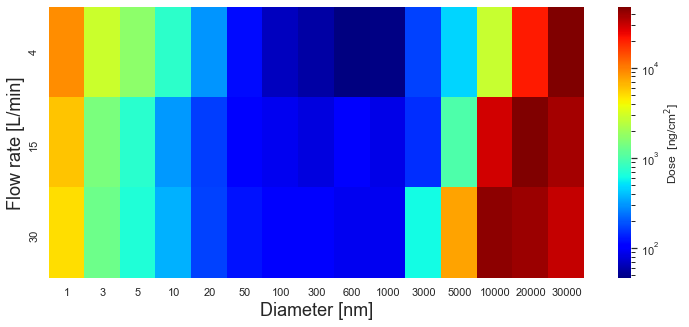

In [22]:
#                       Heatmap plot for different regions --> "Nasal Valve"
df_nv = pd.read_excel("df.xlsx")
df_nv = df_nv.set_index('flow rate [L/min]', drop=False)

df_nv = df_nv[df_nv['region'] == 'nasal valve']
df_nv =df_nv[['1','3','5','10', '20','50', '100','300', '600', '1000', '3000', '5000', '10000','20000', '30000']]
#df_nv = df_nv.drop('file_name', axis=1)
#sns.set_style(style='white')

plt.figure(figsize=(12, 5))

sns.heatmap(df_nv, norm=LogNorm(), cmap="jet", cbar_kws={'label': 'Dose  [ng/cm$^2$]'})
plt.ylabel('Flow rate [L/min]', fontsize = 18)
plt.xlabel('Diameter [nm]', fontsize= 18)
plt.savefig('nasalValve_heatmap.jpeg', dpi=300, bbox_to_inches='tight')
#plt.gcf().subplots_adjust(bottom=0.20)
plt.show()

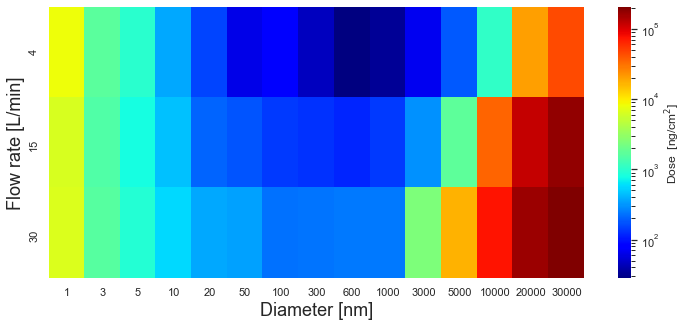

In [25]:
df_vb = pd.read_excel("df.xlsx")
df_vb = df_vb.set_index('flow rate [L/min]', drop=False)
df_vb = df_vb[df_vb['region'] == 'vestibule']
df_vb =df_vb[['1','3','5','10', '20','50', '100','300', '600', '1000', '3000', '5000', '10000','20000', '30000']]
#df_nv = df_nv.drop('file_name', axis=1)
#sns.set_style(style='white')
plt.figure(figsize=(12, 5))

sns.heatmap(df_vb, norm=LogNorm(), cmap="jet", cbar_kws={'label': 'Dose  [ng/cm$^2$]'})
plt.ylabel('Flow rate [L/min]', fontsize = 18)
plt.xlabel('Diameter [nm]', fontsize= 18)
plt.savefig('vestibule_heatmap.jpeg', dpi=300, bbox_to_inches='tight')
plt.show()

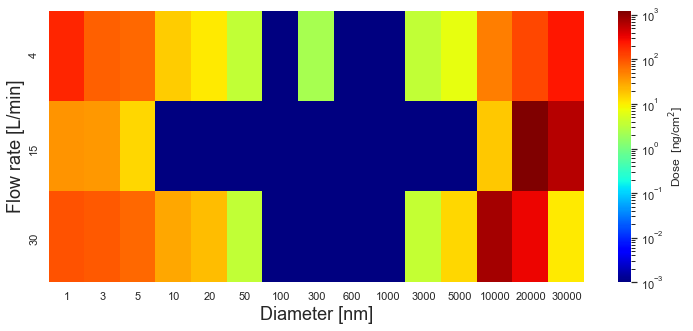

In [26]:
#                               Olfactory heatmap
df_of = pd.read_excel('df.xlsx')
df_of = df_of.set_index('flow rate [L/min]', drop=False)
df_of = df_of[df_of['region'] == 'olfactory']
df_of =df_of[['1','3','5','10', '20','50', '100','300', '600', '1000', '3000', '5000', '10000','20000', '30000']]
#df_nv = df_nv.drop('file_name', axis=1)
#sns.set_style(style='white')
plt.figure(figsize=(12, 5))

sns.heatmap(df_of, norm=LogNorm(), cmap="jet", cbar_kws={'label': 'Dose  [ng/cm$^2$]'})
plt.ylabel('Flow rate [L/min]', fontsize = 18)
plt.xlabel('Diameter [nm]', fontsize= 18)
plt.savefig('olfactory_heatmap.jpeg', dpi=300, bbox_to_inches='tight')
plt.show()

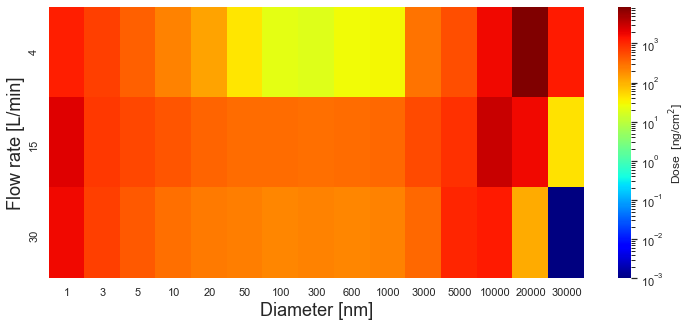

In [27]:
#                               Nasopharynx heatmap
df_np = pd.read_excel('df.xlsx')
df_np = df_np.set_index('flow rate [L/min]', drop=False)
df_np = df_np[df_np['region'] == 'nasopharynx']
df_np =df_np[['1','3','5','10', '20','50', '100','300', '600', '1000', '3000', '5000', '10000','20000', '30000']]
#df_nv = df_nv.drop('file_name', axis=1)
#sns.set_style(style='white')
plt.figure(figsize=(12, 5))

sns.heatmap(df_np, norm=LogNorm(), cmap="jet", cbar_kws={'label': 'Dose  [ng/cm$^2$]'})
plt.ylabel('Flow rate [L/min]', fontsize = 18)
plt.xlabel('Diameter [nm]', fontsize= 18)
plt.savefig('nasopharynx_heatmap.jpeg', dpi=300, bbox_to_inches='tight')
plt.show()

In [30]:
df_melt=pd.melt(df,id_vars=['flow rate [L/min]', 'region', 'name'],
           value_vars=['1','3','5','10', '20','50', '100','300', '600', '1000', '3000', '5000', '10000','20000', '30000'],
           value_name='Dose')
df_melt['log10_Dose']=np.log10(df_melt['Dose'])
df_melt.describe()

,flow rate [L/min],name,Dose,log10_Dose
count,180.000000,180.000000,180.000000,180.000000
mean,16.333333,1.500000,7171.886972,2.079010
std,10.685969,1.121153,26875.455996,1.910095
min,4.000000,0.000000,0.001000,-3.000000
25%,4.000000,0.750000,56.347073,1.750583
50%,15.000000,1.500000,242.502917,2.384648
75%,30.000000,2.250000,1059.345185,3.025036
max,30.000000,3.000000,208549.033296,5.319208


(0, 7)

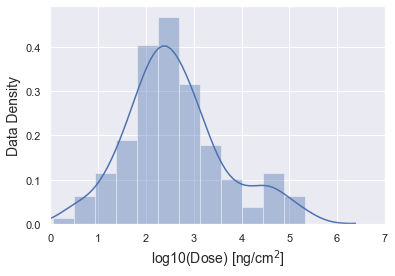

In [32]:
sns.distplot(df_melt['log10_Dose'], label = "Data").set(xlim=(0))
#sns.distplot(df_smogn_gaussian_noise['Dose'], label = "Oversampled").set(xlim=(0))
plt.xlabel('log10(Dose) [ng/cm$^2$]', fontsize= 14)
plt.ylabel('Data Density', fontsize= 14)
plt.savefig('distribution.jpeg', dpi=300)
plt.xlim(0,7)

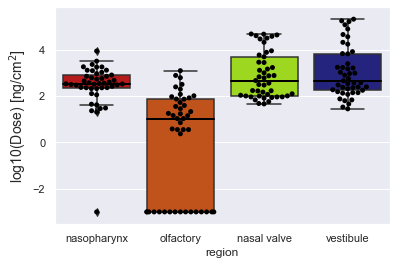

In [33]:

my_pal = {"vestibule": "#24247e", "nasal valve": "#9dd720", "olfactory":"#c0531b", "nasopharynx":"#b61b1c"}
my_pal_2 = {"vestibule": "black", "nasal valve": "black", "olfactory":"black", "nasopharynx":"black"}
medianprops = dict(linestyle='-', linewidth=2, color='black')
ax = sns.boxplot(x="region", y="log10_Dose", data=df_melt, palette=my_pal, saturation=100, medianprops=medianprops, order=['nasopharynx','olfactory','nasal valve','vestibule'])
ax = sns.swarmplot(x="region", y="log10_Dose", data=df_melt, palette=my_pal_2, order=['nasopharynx','olfactory','nasal valve','vestibule'])

plt.ylabel('log10(Dose) [ng/cm$^2$]', fontsize= 14)
#plt.xticks('nasopharynx','olfactory','nasal valve','vestibule')
# add stripplot
#ax = sns.stripplot(x='region', y='log10(Dose) [ng/cm$^2$]', data=df_melt, color="black", jitter=0.2, size=2.5)
plt.savefig('boxplot.jpeg', dpi =300)

Gradient Boosting :
MSE: 43719079.0007
MAE: 2633.2663
Score: 0.957



C:\Users\alifa\anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in log10


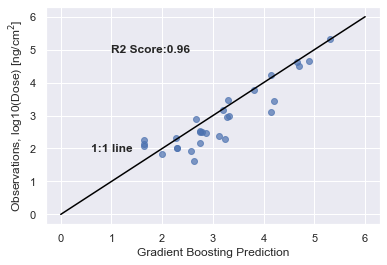

Random Forest :
MSE: 108332595.4772
MAE: 3463.6028
Score: 0.8934



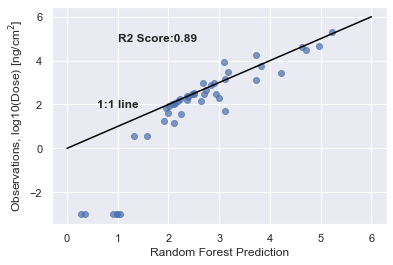

In [39]:
df_melt = df_melt.rename(columns={"variable":"diameter"})
df_melt = df_melt.rename(columns={"name":"region in nose"})

df_melt['region in nose']=df_melt['region in nose'].astype('float64')
df_melt['diameter']=df_melt['diameter'].astype('float64')


X=df_melt.loc[:,['flow rate [L/min]', 'region in nose', 'diameter']]
Y =df_melt.loc[:,'Dose']

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_validate,cross_val_score, KFold

from sklearn.linear_model import LinearRegression,Lasso,Lars,LassoLars,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor,XGBRFRegressor

mse=[]
mae=[]
r2=[]

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=120)


#    Whole data prediction without upsampling
algorithms={#'Linear Regression':LinearRegression(),
            #'Lasso Regression':Lasso(),
            #'Lars Regression':Lars(),
            #'Lasso Lars Regression':LassoLars(),
            #'ElasticNet Regression':ElasticNet(),
            #'KNN-U Regression':KNeighborsRegressor(n_neighbors=5,weights='uniform'),
            #'KNN_D  Regression':KNeighborsRegressor(n_neighbors=5,weights='distance'),
            #'SVR Regression':SVR(kernel='rbf'),
            'Gradient Boosting':GradientBoostingRegressor(random_state=120),
            #'HistGradientBoosting_Regression':HistGradientBoostingRegressor(),
            'Random Forest':RandomForestRegressor(random_state=120),
            #'MLP Regression':MLPRegressor(hidden_layer_sizes=(20,20,20,20)),
            #'XGBoost_Regression':XGBRegressor(),
            #'XGBoost_RF Regression':XGBRFRegressor()
            }

for alg in algorithms:

    print(alg,':')
    algorithms[alg].fit(xtrain,ytrain)
    ypred=algorithms[alg].predict(xtest)

    scores = cross_validate(algorithms[alg], xtrain,ytrain, cv=KFold(n_splits=5, shuffle=True),
                            scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)

    print('MSE:',round(mean_squared_error(ytest,ypred),4))
    print('MAE:',round(mean_absolute_error(ytest,ypred),4))
    print('Score:',round(r2_score(ytest,ypred),4))
    '''
    print('Fit Time:',round(scores['fit_time'].mean(),3),'(',round(scores['fit_time'].std(),3),')')
    print('Score Time:',round(scores['score_time'].mean(),3),'(',round(scores['score_time'].std(),3),')')

    print('Train MSE:',round(-scores['train_neg_mean_squared_error'].mean(),3),
          '(',round(scores['train_neg_mean_squared_error'].std(),3),')')
    print('Test MSE:',round(-scores['test_neg_mean_squared_error'].mean(),3),
          '(',round(scores['test_neg_mean_squared_error'].std(),3),')')
    print('Train MAE - Mean(std):\n',round(-scores['train_neg_mean_absolute_error'].mean(),3),
          '(',round(scores['train_neg_mean_absolute_error'].std(),3),')')
    print('Test MAE - Mean(std):\n',round(-scores['test_neg_mean_absolute_error'].mean(),3),
          '(',round(scores['test_neg_mean_absolute_error'].std(),3),')')
    print('Train-R2 Mean(std):',round(scores['train_r2'].mean(),3),'(',round(scores['train_r2'].std(),3),')')
    print('Test-R2:',round(scores['test_r2'].mean(),3),'(',round(scores['test_r2'].std(),3),')')
    '''
    print('')

    mse.append(round(mean_squared_error(ytest,ypred),4))
    mae.append(round(mean_absolute_error(ytest,ypred),4))
    r2.append(round(r2_score(ytest,ypred),4))

    plt.scatter(np.log10(ypred), np.log10(ytest), alpha=0.7)
    x_coordinates = [0, 6]
    y_coordinates = [0, 6]
    plt.plot(x_coordinates, y_coordinates, c='black')
    plt.text(1, 2,'1:1 line', ha='center', va='center', fontweight="bold")
    plt.text(1, 5,f'R2 Score:{round(r2_score(ytest,ypred),2)}', ha='left', va='center', fontweight="bold")
   #plt.text(1, 4.5,f'MSE:{round(mean_squared_error(ytest,ypred),2)}', ha='left', va='center')
    #plt.text(1,4,f'MAE:{round(mean_absolute_error(ytest,ypred),2)}', ha='left', va='center')

    plt.ylabel('Observations, log10(Dose) [ng/cm$^2$]')
    plt.xlabel(f'{alg} Prediction')
    #log10(Dose) [ng/cm$^2$]
    #plt.title(f'{alg}')

    plt.savefig(f'Dose_Regression_{alg}.jpeg', dpi=300)
    plt.show()

In [40]:
#feature importance, Random Forest
reg_rf=RandomForestRegressor(random_state=120)
reg_rf.fit(xtrain,ytrain)
reg_gb=GradientBoostingRegressor(random_state=120)
reg_gb.fit(xtrain, ytrain)

# ypred_rf=reg_rf.predict(xtest)
imp_rf=reg_rf.feature_importances_
imp_gb=reg_gb.feature_importances_

importance=[]
for i in zip(X.columns,imp_rf, imp_gb):
    importance.append(list(i))
ddff=pd.DataFrame(importance,columns=['Feature','Importance_RF', 'Importance_GB'])
ddff

,Feature,Importance_RF,Importance_GB
0,flow rate [L/min],0.133866,0.190438
1,region in nose,0.489910,0.542358
2,diameter,0.376225,0.267204


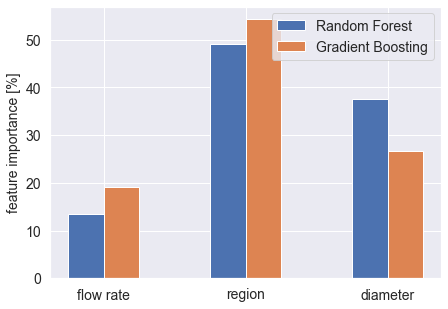

In [41]:
plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=14) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend
# first ones for non-pulsatin
# second ones for pulsating

#RC= (64, 57)
#LC= (36, 43)

#RO= (0.9365, 0.3511)
#LO= (0.0015, 0.0066)
R_L = ddff['Importance_RF']*100
L_R = ddff['Importance_GB']*100

ind = np.arange(len(R_L))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 5))
rects1 = ax.bar(ind - width/2, R_L, width,label='Random Forest', align='center')
rects2 = ax.bar(ind + width/2, L_R, width,label='Gradient Boosting', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('feature importance [%]', fontsize = 14)

ax.set_xticks(ind)
#ax.set_xticklabels(('non pulsating $d_p$ = 1 $\mu$m', 'pulsating $d_p$ = 1 $\mu$m'))
ax.set_xticklabels(('flow rate', 'region', 'diameter'))
ax.legend(loc='best', fontsize = 14)
plt.rcParams["axes.grid"] = False
#ax.set_yscale('log')

fig.savefig('feature_importance.jpeg', dpi=300)
plt.show()